In [26]:
import zipfile

# Path to the uploaded zip file
zip_file_path = '/content/slash.zip'  # Update with the correct path

# Extract the contents of the zip file
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall('/content/slash')

# Once extracted, the folders will be available in the '/content/slash' directory


In [30]:
import os
import cv2
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

# Function to load images from a directory
def load_images_from_dir(directory):
    images = []
    labels = []
    for file in os.listdir(directory):
        img_path = os.path.join(directory, file)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB
        images.append(img)
        labels.append(directory.split('/')[-1])  # Extract the category name from the directory
    return images, labels

# Path to the 'slash' folder where the subfolders are located
slash_dir = '/content/slash'  # Update with the correct path

# Step 1: Data Loading
bags_dir = os.path.join(slash_dir, 'bags')
clothing_dir = os.path.join(slash_dir, 'clothing')
accessories_dir = os.path.join(slash_dir, 'accessories')

bags_images, bags_labels = load_images_from_dir(bags_dir)
clothing_images, clothing_labels = load_images_from_dir(clothing_dir)
accessories_images, accessories_labels = load_images_from_dir(accessories_dir)

# Combine images and labels from all categories
images = bags_images + clothing_images + accessories_images
labels = bags_labels + clothing_labels + accessories_labels

# Step 2: Data Preprocessing
images_resized = [cv2.resize(img, (150, 150)) for img in images]
images_array = np.array(images_resized) / 255.0  # Normalize pixel values

# Step 3: Label Encoding
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Step 4: Train-Validation-Test Split with Shuffling
X_train, X_test, y_train, y_test = train_test_split(images_array, labels_encoded, test_size=0.2, random_state=42, shuffle=True)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=42, shuffle=True)

# Step 5: Model Building
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Fine-Tuning
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Testing
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)



Epoch 1/10
1/1 [==============================] - 5s 5s/step - loss: 1.0855 - accuracy: 0.8000 - val_loss: 3.1009 - val_accuracy: 0.0000e+00
Epoch 2/10
1/1 [==============================] - 0s 325ms/step - loss: 0.7326 - accuracy: 0.6000 - val_loss: 3.0005 - val_accuracy: 0.0000e+00
Epoch 3/10
1/1 [==============================] - 0s 323ms/step - loss: 0.6853 - accuracy: 0.4000 - val_loss: 3.5954 - val_accuracy: 0.0000e+00
Epoch 4/10
1/1 [==============================] - 0s 278ms/step - loss: 0.5245 - accuracy: 0.8000 - val_loss: 4.9633 - val_accuracy: 0.0000e+00
Epoch 5/10
1/1 [==============================] - 0s 299ms/step - loss: 0.4057 - accuracy: 0.6000 - val_loss: 5.9126 - val_accuracy: 0.0000e+00
Epoch 6/10
1/1 [==============================] - 0s 288ms/step - loss: 0.2210 - accuracy: 1.0000 - val_loss: 7.5046 - val_accuracy: 0.0000e+00
Epoch 7/10
1/1 [==============================] - 0s 270ms/step - loss: 0.1549 - accuracy: 1.0000 - val_loss: 10.1247 - val_accuracy: 0.000

Epoch 1/20
1/1 [==============================] - 1s 1s/step - loss: 0.8344 - accuracy: 0.6000 - val_loss: 42.0452 - val_accuracy: 0.0000e+00
Epoch 2/20


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1/1 [==============================] - 0s 479ms/step - loss: 0.7413 - accuracy: 0.4000 - val_loss: 41.8503 - val_accuracy: 0.0000e+00
Epoch 3/20
1/1 [==============================] - 1s 533ms/step - loss: 2.1610 - accuracy: 0.4000 - val_loss: 35.2350 - val_accuracy: 0.0000e+00
Epoch 4/20
1/1 [==============================] - 1s 594ms/step - loss: 0.5131 - accuracy: 0.6000 - val_loss: 30.4575 - val_accuracy: 0.0000e+00
Epoch 5/20
1/1 [==============================] - 1s 515ms/step - loss: 0.6382 - accuracy: 0.6000 - val_loss: 25.0513 - val_accuracy: 0.0000e+00
Epoch 6/20
1/1 [==============================] - 0s 458ms/step - loss: 0.8575 - accuracy: 0.6000 - val_loss: 20.0178 - val_accuracy: 0.0000e+00
Epoch 7/20
1/1 [==============================] - 0s 325ms/step - loss: 0.5899 - accuracy: 0.8000 - val_loss: 16.6284 - val_accuracy: 0.0000e+00
Epoch 8/20
1/1 [==============================] - 0s 322ms/step - loss: 0.8403 - accuracy: 0.6000 - val_loss: 13.6908 - val_accuracy: 0.0000e

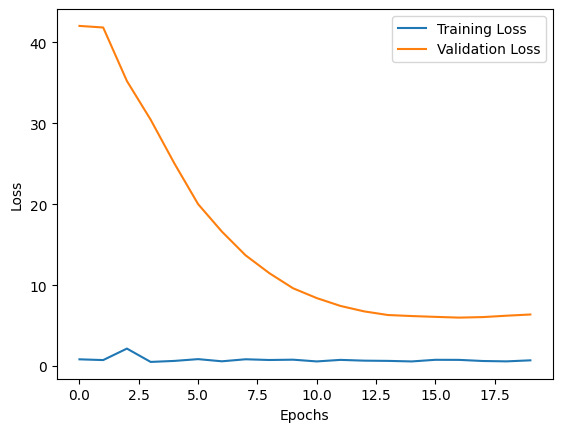

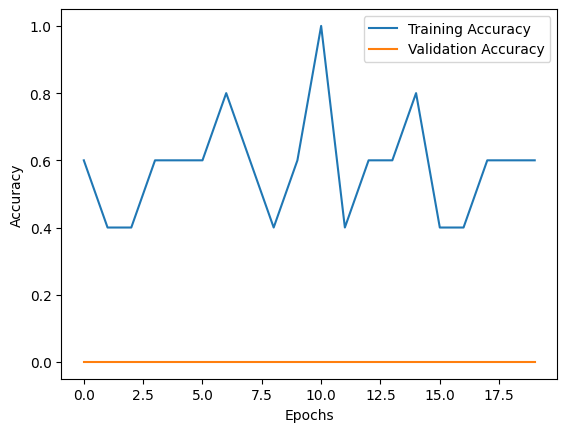

In [28]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler

# Step 2: Data Augmentation
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='nearest')

# Apply data augmentation only on the training set
train_generator = train_datagen.flow(X_train, y_train, batch_size=32)

# Step 3: Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.h5', monitor='val_accuracy', save_best_only=True)

# Step 5: Model Training with Callbacks
history = model.fit(train_generator, epochs=20, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, model_checkpoint])

# Step 6: Model Evaluation
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Step 7: Plotting Training and Validation Curves
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()
